In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os

In [13]:
strategies_list = ['RandomSampling', 'UncSampling']# 
func = 'train_SLSN'

first_version = 0
n_versions = 5
n_loops = 5000
batch_size = 10

dirname = f'results/{func}/'

In [14]:
flist = {}

for name in strategies_list:
    flist[name] = os.listdir(dirname + '/' + name + '/metrics/')

In [15]:
metrics = {}

for name in strategies_list:
    
    metrics[name] = {}
    
    for i in range(first_version, n_versions+first_version):
        metrics[name][i] = pd.read_csv(dirname + '/' + name + '/metrics/metrics_' + \
                                           name + '_v' + str(i) + '.dat', index_col=False,
                                           sep=' ')

In [16]:
acc = {}
eff = {}
pur = {}
fom = {}

acc_mean = {}
eff_mean = {}
pur_mean = {}
fom_mean = {}

acc_std = {}
eff_std = {}
pur_std = {}
fom_std = {}



for name in strategies_list:
    vs = range(first_version,n_versions+first_version)
    acc[name] = np.array([metrics[name][i][:n_loops]['accuracy'].values for i in vs])
    pur[name] = np.array([metrics[name][i][:n_loops]['purity'].values for i in vs])
    eff[name] = np.array([metrics[name][i][:n_loops]['efficiency'].values for i in vs])
    fom[name] = np.array([metrics[name][i][:n_loops]['fom'].values for i in vs])

    acc_mean[name] = np.array([np.mean(acc[name][:,i]) for i in range(n_loops)])
    acc_std[name] = np.array([np.std(acc[name][:,i]) for i in range(n_loops)])

    pur_mean[name] = np.array([np.mean(pur[name][:,i]) for i in range(n_loops)])
    pur_std[name] = np.array([np.std(pur[name][:,i]) for i in range(n_loops)])

    eff_mean[name] = np.array([np.mean(eff[name][:,i]) for i in range(n_loops)])
    eff_std[name] = np.array([np.std(eff[name][:,i]) for i in range(n_loops)])

    fom_mean[name] = np.array([np.mean(fom[name][:,i]) for i in range(n_loops)])
    fom_std[name] = np.array([np.std(fom[name][:,i]) for i in range(n_loops)])

In [17]:
sampling_metric = 'UncSampling'

best_pur = [metrics[sampling_metric][i].iloc[-1]['purity'] for i in vs]
best_eff = [metrics[sampling_metric][i].iloc[-1]['efficiency'] for i in vs]

best_mult = np.array(best_pur)*np.array(best_eff)
best_f1 = 2*np.array(best_pur)*np.array(best_eff) / (np.array(best_pur)+np.array(best_eff))
best_f1

array([0.99173048, 0.9918525 , 0.99127866, 0.99094062, 0.9919288 ])

In [18]:
indicator = list(best_f1)
best_run = range(first_version,n_versions+first_version)[indicator.index(max(indicator))]
best_run

4

In [19]:
print(metrics[sampling_metric][best_run].iloc[-1]['accuracy'])
print(metrics[sampling_metric][best_run].iloc[-1]['purity'])
print(metrics[sampling_metric][best_run].iloc[-1]['efficiency'])

0.998593051943722
0.9960819462227912
0.9878101429768646


In [20]:
for name in strategies_list:
    print('acc ', name, ': ', acc_mean[name][-1], ' +/- ', acc_std[name][-1])
    print('eff ', name, ': ', eff_mean[name][-1], ' +/- ', eff_std[name][-1])
    print('pur ', name, ': ', pur_mean[name][-1], ' +/- ', pur_std[name][-1])
    print('fom ', name, ': ', fom_mean[name][-1], ' +/- ', fom_std[name][-1])
    print('\n')

acc  RandomSampling :  0.9687172990153586  +/-  0.0003666055523578993
eff  RandomSampling :  0.818488881467115  +/-  0.003578888539018801
pur  RandomSampling :  0.9143664216433282  +/-  0.0006247633585214014
fom  RandomSampling :  0.638963533899095  +/-  0.0023681006386478158


acc  UncSampling :  0.9985245938076505  +/-  6.780263062364998e-05
eff  UncSampling :  0.9876538916239135  +/-  0.00014098484271505885
pur  UncSampling :  0.9954695830130307  +/-  0.0007151285766627875
fom  UncSampling :  0.9743539900182883  +/-  0.0021151839623727953




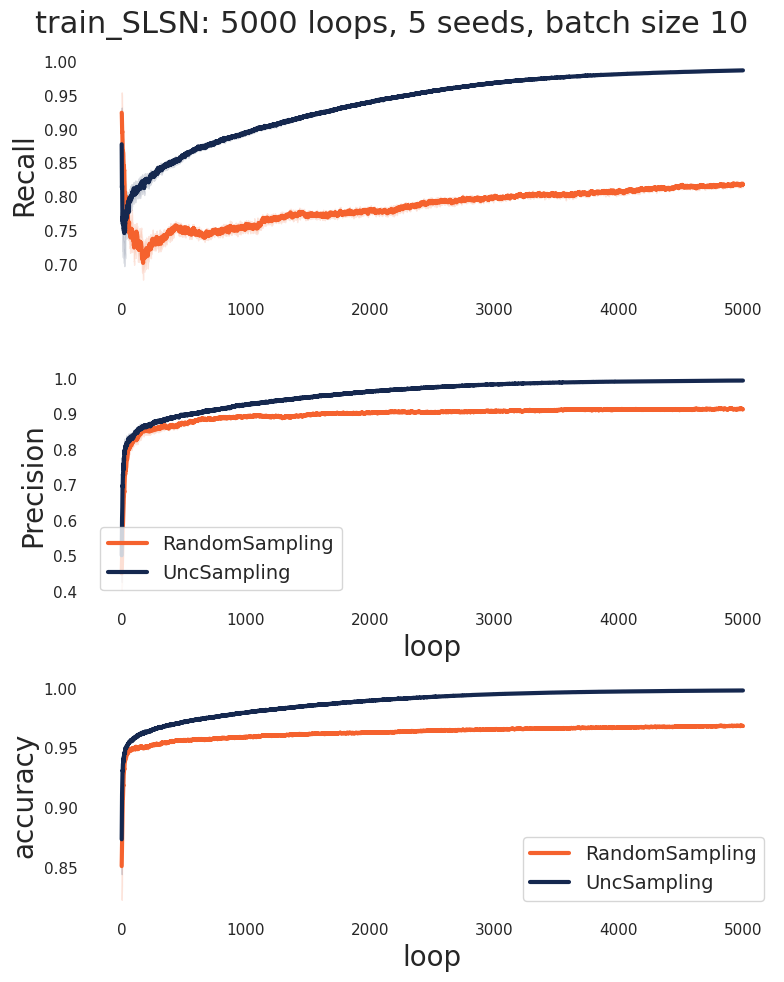

In [21]:
c = ['#F5622E', '#15284F']

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

i = first_version
lw = 3
global_font = 20

text_x = 0.53
text_y = 0.14
ecart_y = 0.41
petit_ecart_y = 0.03
text_font = 15

plt.figure(figsize=(8,10))
plt.suptitle(f'{func}: {n_loops} loops, {n_versions} seeds, batch size {batch_size}', fontsize=22)

plt.subplot(3,1,1)
for name in strategies_list:
    plt.plot(metrics[name][i][:n_loops]['loop'], eff_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i][:n_loops]['loop'], eff_mean[name] - eff_std[name], eff_mean[name] + eff_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)

plt.ylabel('Recall', fontsize=global_font)

#plt.figtext(text_x , text_y+ecart_y, f"UncSampling : {eff_mean['UncSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[0])
#plt.figtext(text_x , text_y+ecart_y+ petit_ecart_y, f"RandomSampling : {eff_mean['RandomSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[1])

plt.subplot(3,1,2)
for name in strategies_list:
    plt.plot(metrics[name][i][:n_loops]['loop'], pur_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i][:n_loops]['loop'], pur_mean[name] - pur_std[name], pur_mean[name] + pur_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)

plt.ylabel('Precision', fontsize=global_font)
plt.xlabel('loop', fontsize=global_font)
plt.legend(loc='lower left', fontsize=14)


#plt.figtext(text_x , text_y, f"UncSampling : {pur_mean['UncSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[0])
#plt.figtext(text_x , text_y+petit_ecart_y, f"RandomSampling : {pur_mean['RandomSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[1])


plt.subplot(3,1,3)
for name in strategies_list:
    plt.plot(metrics[name][i][:n_loops]['loop'], acc_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i][:n_loops]['loop'], acc_mean[name] - acc_std[name], acc_mean[name] + acc_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)

plt.ylabel('accuracy', fontsize=global_font)
plt.xlabel('loop', fontsize=global_font)
plt.legend(loc='lower right', fontsize=14)

#plt.figtext(text_x , text_y, f"UncSampling : {pur_mean['UncSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[0])
#plt.figtext(text_x , text_y+petit_ecart_y, f"RandomSampling : {pur_mean['RandomSampling'][-1]*100:.1f} %", fontsize=text_font, color=c[1])


#plt.legend(fontsize=14)

plt.tight_layout()
#plt.savefig(f"results/{func}/{func}.png")

#plt.show()

# Create a training test from the best loop

In [22]:
ids = pd.read_csv(f'results/{func}/UncSampling/queries/queried_UncSampling_v{best_run}.dat', index_col=False,sep=' ')['id'][:batch_size*n_loops]
full_training = pd.read_parquet(f'input/{func}.parquet')
training = full_training[full_training['id'].isin(ids)]

training.to_parquet(f'Analysis/optimal_training/optimal_training_{func}.parquet')

/tmp/ipykernel_58238/396789140.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  ids = pd.read_csv(f'results/{func}/UncSampling/queries/queried_UncSampling_v{best_run}.dat', index_col=False,sep=' ')['id'][:batch_size*n_loops]


## Train and save a model

In [23]:
from sklearn.ensemble import RandomForestClassifier
import joblib

clf = RandomForestClassifier(random_state=0, max_depth=15, min_samples_leaf=0.0001)
clf.fit(training.iloc[:, 2:], training['type'])
joblib.dump(clf, f'Analysis/models/{func}.joblib')

['Analysis/models/train_SLSN.joblib']